In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import redcaputils
import statsmodels.formula.api as smf
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
patients = pd.read_csv("patients.csv")
controls = pd.read_csv("controls.csv")
df = pd.concat([patients, controls])

# Correlations with statistical significance

In [3]:
df = df[df['redcap_event_name'] == 'enrollment_arm_1'].drop(['study_id', 'redcap_event_name', 'pohlavi'], axis=1)
#variables = ['variable1', 'variable2'] #either select few variables
variables = df.columns #or use all

corr_r = {}
corr_p = {}
corr_b = {} #survives Bonferoni
Bonferoni = 0.05/float(len(variables)*len(patients.columns))

for variable in variables:
    corr_r[variable] = []
    corr_p[variable] = []
    corr_b[variable] = []
    for column in df.columns:
        if variable == column:
            corr_r[variable].append(1)
            corr_p[variable].append(0)
            corr_b[variable].append( True )
        else:    
            corrdf = df[[variable, column]].dropna(how='any')
            r, p = scipy.stats.pearsonr(corrdf[variable], corrdf[column])
            corr_r[variable].append(r)
            corr_p[variable].append(p)
            corr_b[variable].append( p < Bonferoni )
corr_r = pd.DataFrame(corr_r, index=df.columns)
corr_p = pd.DataFrame(corr_p, index=df.columns)
corr_b = pd.DataFrame(corr_b, index=df.columns)

In [4]:
corr_r.sort_index()

,age,bdi_v2,bfi_e_v2,bfi_n_v2,bfi_o_v2,bfi_p_v2,bfi_s_v2,duration,eq5d3l_v2,eq5d3l_vas_v2,ess_v2,f_phq_somatic,f_phq_suma,fss_v2,rls_dg,s_fmdrs_sum,scc_v2,sf_12_v2,stai_i_v2,stai_ii_v2,vas_4wk_aver_v2,vas_now_v2
age,1.000000,0.253547,-0.297937,0.172694,-0.125432,-0.009889,0.116343,0.121827,0.478618,-0.605149,0.055259,0.324050,0.148547,-0.010438,0.263996,0.237113,0.174885,-0.248480,0.201887,0.313166,-0.098454,0.283714
bdi_v2,0.253547,1.000000,-0.656813,0.773924,-0.355923,-0.172697,-0.494233,-0.057379,0.610704,-0.441952,0.254291,0.525429,0.515282,0.324438,-0.037659,0.107438,0.657891,-0.846802,0.894354,0.866828,0.251355,0.323681
bfi_e_v2,-0.297937,-0.656813,1.000000,-0.681984,0.305391,0.321078,0.351108,-0.093389,-0.501070,0.275238,-0.056555,-0.426541,-0.407657,-0.405282,-0.041222,0.001625,-0.473555,0.713088,-0.645615,-0.715136,-0.105168,-0.115230
bfi_n_v2,0.172694,0.773924,-0.681984,1.000000,-0.418744,-0.387308,-0.481077,0.002034,0.586580,-0.341587,0.250723,0.532090,0.500128,0.514379,-0.216181,0.276960,0.606519,-0.705214,0.715020,0.785014,0.200099,0.263873
bfi_o_v2,-0.125432,-0.355923,0.305391,-0.418744,1.000000,0.248218,0.587065,0.161144,-0.202369,0.210120,-0.115829,0.012569,-0.106941,-0.093014,0.200953,-0.271651,-0.173730,0.376469,-0.413590,-0.357453,-0.196923,0.010310
bfi_p_v2,-0.009889,-0.172697,0.321078,-0.387308,0.248218,1.000000,0.519470,0.255093,-0.118576,-0.095747,-0.145297,0.089490,-0.022283,0.038012,0.415359,-0.114249,-0.349040,0.240926,-0.160540,-0.264916,0.092711,0.200143
bfi_s_v2,0.116343,-0.494233,0.351108,-0.481077,0.587065,0.519470,1.000000,0.083089,-0.169597,-0.056559,-0.289413,-0.025766,-0.162641,-0.071755,0.378248,0.043050,-0.397007,0.398724,-0.446106,-0.399719,0.075674,0.216075
duration,0.121827,-0.057379,-0.093389,0.002034,0.161144,0.255093,0.083089,1.000000,-0.019222,-0.059653,-0.435496,0.058046,0.058663,-0.032888,0.087571,-0.181916,-0.114553,0.094485,-0.010129,-0.073682,-0.086328,0.005915
eq5d3l_v2,0.478618,0.610704,-0.501070,0.586580,-0.202369,-0.118576,-0.169597,-0.019222,1.000000,-0.756998,0.210771,0.610326,0.444484,0.269534,-0.078269,0.399788,0.488226,-0.592078,0.546474,0.610027,0.213879,0.439414
eq5d3l_vas_v2,-0.605149,-0.441952,0.275238,-0.341587,0.210120,-0.095747,-0.056559,-0.059653,-0.756998,1.000000,-0.059521,-0.522200,-0.348993,-0.142777,-0.067999,-0.323972,-0.231769,0.456535,-0.317331,-0.379269,-0.262137,-0.575769


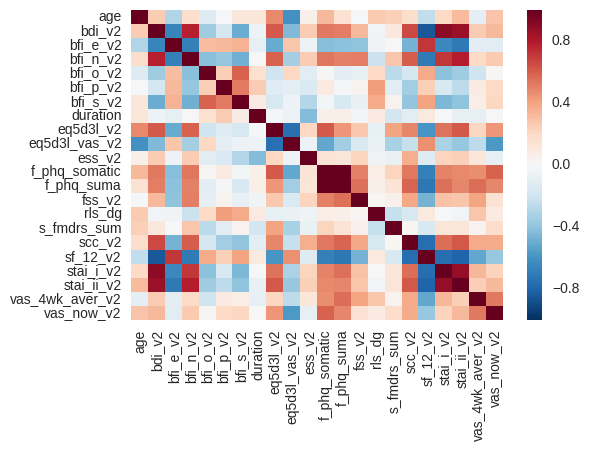

In [5]:
sns.heatmap(corr_r.sort_index())

In [6]:
corr_b.sort_index()

,age,bdi_v2,bfi_e_v2,bfi_n_v2,bfi_o_v2,bfi_p_v2,bfi_s_v2,duration,eq5d3l_v2,eq5d3l_vas_v2,ess_v2,f_phq_somatic,f_phq_suma,fss_v2,rls_dg,s_fmdrs_sum,scc_v2,sf_12_v2,stai_i_v2,stai_ii_v2,vas_4wk_aver_v2,vas_now_v2
age,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bdi_v2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False
bfi_e_v2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
bfi_n_v2,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False
bfi_o_v2,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bfi_p_v2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bfi_s_v2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
duration,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
eq5d3l_v2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
eq5d3l_vas_v2,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False


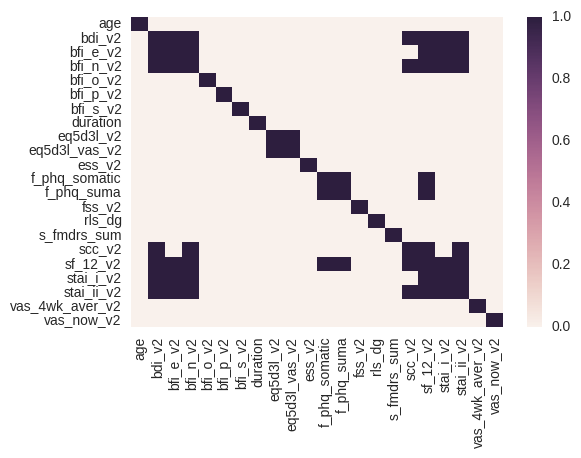

In [7]:
sns.heatmap(corr_b.sort_index())